In [4]:
import requests

url = "https://www.openml.org/data/download/22102255/dataset"
r = requests.get(url, allow_redirects=True)

In [5]:
with open("dataset.txt", "wb") as f:
    f.write(r.content)

In [6]:
import pandas as pd

In [7]:
data = []

with open("dataset.txt", "r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@") or line.startswith("%") or line == "":
            continue
        data.append(line)

In [8]:
columns = []

with open("dataset.txt", "r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@ATTRIBUTE"):
            columns.append(line.split(" ")[1])

In [9]:
with open("df.csv", "w") as f:
    f.write(",".join(columns))
    f.write("\n")
    f.write("\n".join(data))


In [10]:
df = pd.read_csv("df.csv")
df.columns = columns

In [11]:
df["t_win"] = df.round_winner.astype("category").cat.codes


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations = df[columns+["t_win"]].corr()
print(correlations['t_win'].apply(abs).sort_values(ascending=False).iloc[:25])

selected_columns = []

for col in columns+['t_win']:
    try:
        if abs(correlations[col]['t_win']) > 0.15:
            selected_columns.append(col)
    except KeyError:
        pass

df_selected = df[selected_columns]

t_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
bomb_planted                    0.187101
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps   

In [13]:
df_selected

,bomb_planted,ct_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,ct_weapon_ak47,t_weapon_ak47,...,ct_weapon_m4a4,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,ct_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_win
0,False,500.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
1,False,500.0,400.0,300.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
2,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
3,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
4,False,500.0,192.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
5,False,500.0,500.0,0.0,5.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,3.0,3.0,0.0,3.0,1.0,0
6,False,295.0,296.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0
7,False,295.0,296.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0
8,False,249.0,269.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0
9,False,500.0,196.0,0.0,2.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0


In [14]:
print(len(df_selected.columns))


21


0.18710090782139746


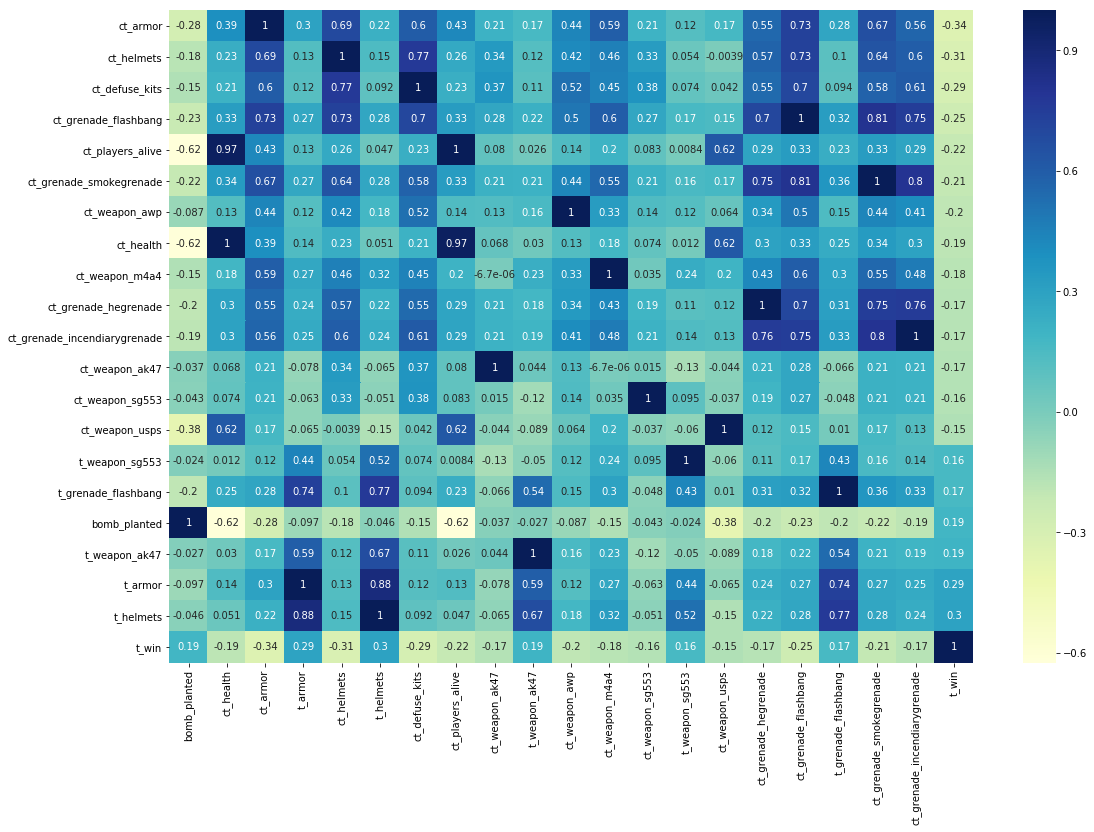

In [15]:
print(correlations['bomb_planted']['t_win'])

plt.figure(figsize=(18, 12))
sns.heatmap(df_selected.corr().sort_values(by='t_win'), annot=True, cmap="YlGnBu")

In [16]:
from sklearn.model_selection import train_test_split

X, y = df_selected.drop(["t_win"], axis=1), df_selected["t_win"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype bool, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype bool, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype bool, float64 were all converted to float64 by StandardScaler.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review you

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
knn.score(X_test_scaled, y_test)

0.7615799362797158

In [19]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_neighbors": list(range(5, 17, 2)),
    "weights": ["uniform", "distance"]
}

knn = KNeighborsClassifier(n_jobs=-1)

clf = RandomizedSearchCV(knn, param_grid, n_jobs=-1, n_iter=3, verbose=2, cv=3)
clf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=3, n_jobs=-1,
          param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [20]:
clf.best_estimator_


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
           weights='distance')

In [21]:
clf.best_estimator_.score(X_test_scaled, y_test)


0.7810227922555347

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_jobs=-1)

forest.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_s

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
forest.score(X_test_scaled, y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.806551752307818

In [31]:
pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/55/d1/a3631a36859ee324e1767fa7554fdf7af17965571d8537b20b311b76bcfe/tensorflow-2.11.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/f7/8c/18288ac12dc0e1997c73f1b86dbd6f7fa3674ae5341769387e1f13b07c9e/tensorflow_intel-2.11.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/19/404708a7e54ad2798907210462fd950c3442ea51acc8790f3da48d2bee8b/opt_einsum-3.3.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6f/77/e624b4916531721e674aa105151ffa5223fb224d3ca4bd5c10574664f944/tensorboard-2.11.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/67/e1/434566ffce04448192369c1a282931cf4ae593e91907558eaecd2e9f2801/termcolor-2.3.0-py3-none-any.whl
  Using cached https://files.python

tensorboard 2.11.2 has requirement setuptools>=41.0.0, but you'll have setuptools 40.8.0 which is incompatible.


In [32]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(20,)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [33]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [34]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

X_train_scaled_train, X_valid, y_train_train, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.15)


model.fit(X_train_scaled_train, y_train_train, epochs=30, callbacks=[early_stopping_cb], validation_data=(X_valid, y_valid))

Epoch 1/30
2602/2602 [==============================] - 7s 2ms/step - loss: 0.4815 - accuracy: 0.7403 - val_loss: 0.4656 - val_accuracy: 0.7533
Epoch 2/30
2602/2602 [==============================] - 5s 2ms/step - loss: 0.4711 - accuracy: 0.7483 - val_loss: 0.4629 - val_accuracy: 0.7545
Epoch 3/30
2602/2602 [==============================] - 5s 2ms/step - loss: 0.4675 - accuracy: 0.7495 - val_loss: 0.4580 - val_accuracy: 0.7557
Epoch 4/30
2602/2602 [==============================] - 5s 2ms/step - loss: 0.4652 - accuracy: 0.7508 - val_loss: 0.4586 - val_accuracy: 0.7583
Epoch 5/30
2602/2602 [==============================] - 5s 2ms/step - loss: 0.4624 - accuracy: 0.7532 - val_loss: 0.4637 - val_accuracy: 0.7565
Epoch 6/30
2602/2602 [==============================] - 5s 2ms/step - loss: 0.4602 - accuracy: 0.7537 - val_loss: 0.4588 - val_accuracy: 0.7550
Epoch 7/30
2602/2602 [==============================] - 5s 2ms/step - loss: 0.4575 - accuracy: 0.7562 - val_loss: 0.4550 - val_accuracy:

In [35]:
model.evaluate(X_test_scaled, y_test)
model.save("200_100_100_csgo.h5")


766/766 [==============================] - 1s 1ms/step - loss: 0.4598 - accuracy: 0.7539


In [36]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(20,)))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [37]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [38]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

X_train_scaled_train, X_valid, y_train_train, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.15)


model.fit(X_train_scaled_train, y_train_train, epochs=30, callbacks=[early_stopping_cb], validation_data=(X_valid, y_valid))

Epoch 1/30
2602/2602 [==============================] - 5s 2ms/step - loss: 0.4860 - accuracy: 0.7388 - val_loss: 0.4719 - val_accuracy: 0.7443
Epoch 2/30
2602/2602 [==============================] - 4s 2ms/step - loss: 0.4720 - accuracy: 0.7450 - val_loss: 0.4663 - val_accuracy: 0.7498
Epoch 3/30
2602/2602 [==============================] - 4s 2ms/step - loss: 0.4688 - accuracy: 0.7477 - val_loss: 0.4638 - val_accuracy: 0.7496
Epoch 4/30
2602/2602 [==============================] - 4s 2ms/step - loss: 0.4662 - accuracy: 0.7497 - val_loss: 0.4620 - val_accuracy: 0.7503
Epoch 5/30
2602/2602 [==============================] - 4s 2ms/step - loss: 0.4646 - accuracy: 0.7514 - val_loss: 0.4621 - val_accuracy: 0.7521
Epoch 6/30
2602/2602 [==============================] - 5s 2ms/step - loss: 0.4629 - accuracy: 0.7523 - val_loss: 0.4609 - val_accuracy: 0.7567
Epoch 7/30
2602/2602 [==============================] - 4s 2ms/step - loss: 0.4615 - accuracy: 0.7538 - val_loss: 0.4603 - val_accuracy:

In [39]:
model.evaluate(X_test_scaled, y_test)


766/766 [==============================] - 1s 1ms/step - loss: 0.4628 - accuracy: 0.7521


[0.4627961218357086, 0.7520627379417419]